f(a1 a2 a3 a4 a5) = 1 + 2a1 + (3a2-1) + 3a3 + 2a4^2 + (5a5 + 2)
wmax = 0.9 wmin = 0.3
n = 20
a1 10, 60
a2 15,30
a3 25,75
a4 10,30
a5 10,50
Perform PSO

Iteration 1: Best value = 7094.2341
Iteration 2: Best value = 7899.9615
Iteration 3: Best value = 7909.1894
Iteration 4: Best value = 7944.2143
Iteration 5: Best value = 7956.0345
Iteration 6: Best value = 7977.7583
Iteration 7: Best value = 7982.0000
Iteration 8: Best value = 7982.0000
Iteration 9: Best value = 7982.0000
Iteration 10: Best value = 7982.0000
Iteration 11: Best value = 7982.0000
Iteration 12: Best value = 7982.0000
Iteration 13: Best value = 7982.0000
Iteration 14: Best value = 7982.0000
Iteration 15: Best value = 7982.0000
Iteration 16: Best value = 7982.0000
Global best position has not changed for 10 iterations. Stopping early.
Best solution found:
a1 = 60.0000
a2 = 60.0000
a3 = 60.0000
a4 = 60.0000
a5 = 60.0000


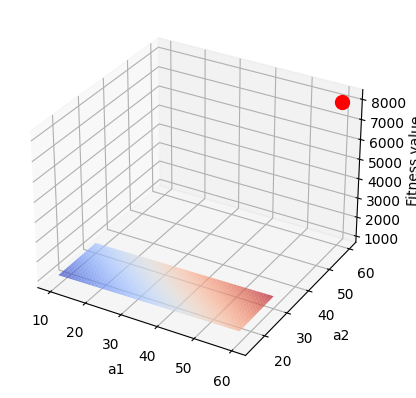

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to maximize
def fitness_function(a1, a2, a3, a4, a5):
    return (1 + 2*a1 + (3*a2 - 1) + 3*a3 + 2*a4**2 + (5*a5 + 2))

# Set the bounds of the search space
bounds = [(10, 60), (15, 30), (25, 75), (10, 30), (10, 50)]

# Set the parameters of the algorithm
num_particles = 10
max_iterations = 100
c1 = 0.8
c2 = 1.4
wmax = 0.9
wmin = 0.3
stability_threshold = 10  # Number of iterations for stability

# Initialize the particles
particles_position = np.random.uniform(low=bounds[0][0], high=bounds[0][1], size=(num_particles, 5))
particles_velocity = np.zeros((num_particles, 5))
particles_best_position = particles_position.copy()
particles_best_value = np.array([fitness_function(*p) for p in particles_position])

# Initialize the global best position
global_best_index = np.argmax(particles_best_value) # Because we are maximizing
global_best_position = particles_best_position[global_best_index]
global_best_value = particles_best_value[global_best_index]

# Initialize variables for early stopping
stability_count = 0
previous_global_best_position = global_best_position

# Run the algorithm
for i in range(max_iterations):
    # Update the particles velocity and position
    w = np.random.uniform(wmin, wmax)
    r1 = np.random.uniform(size=(num_particles, 5))
    r2 = np.random.uniform(size=(num_particles, 5))
    particles_velocity = w * particles_velocity \
                        + c1 * r1 * (particles_best_position - particles_position) \
                        + c2 * r2 * (global_best_position - particles_position)
    particles_position = particles_position + particles_velocity

    # Apply the bounds
    particles_position = np.clip(particles_position, bounds[0][0], bounds[0][1])

    # Update the particles best position and value
    new_particles_best_value = np.array([fitness_function(*p) for p in particles_position])
    mask = new_particles_best_value > particles_best_value # Because we are maximizing
    particles_best_position[mask] = particles_position[mask]
    particles_best_value[mask] = new_particles_best_value[mask]

    # Update the global best position and value
    global_best_index = np.argmax(particles_best_value) # Because we are maximizing
    global_best_position = particles_best_position[global_best_index]
    global_best_value = particles_best_value[global_best_index]

    # Print the best value in the current iteration
    print('Iteration {}: Best value = {:.4f}'.format(i+1, global_best_value))

    # Check for stability of the global best position
    if np.all(previous_global_best_position == global_best_position):
        stability_count += 1
    else:
        stability_count = 0
        previous_global_best_position = global_best_position

    # If stability threshold is reached, break the loop
    if stability_count >= stability_threshold:
        print("Global best position has not changed for {} iterations. Stopping early.".format(stability_threshold))
        break

# Print the values of a1 to a5 for the best solution
print('Best solution found:')
print('a1 = {:.4f}'.format(global_best_position[0]))
print('a2 = {:.4f}'.format(global_best_position[1]))
print('a3 = {:.4f}'.format(global_best_position[2]))
print('a4 = {:.4f}'.format(global_best_position[3]))
print('a5 = {:.4f}'.format(global_best_position[4]))

# Plot the function and the global best position
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

a1_values = np.linspace(bounds[0][0], bounds[0][1], 100)
a2_values = np.linspace(bounds[1][0], bounds[1][1], 100)
a1, a2 = np.meshgrid(a1_values, a2_values)
a3, a4, a5 = np.median(bounds[2:5], axis=1) # Using median as a representative value for other bounds
Z = fitness_function(a1, a2, a3, a4, a5)

ax.plot_surface(a1, a2, Z, cmap='coolwarm', alpha=0.8)
ax.scatter(global_best_position[0], global_best_position[1], global_best_value, color='red', s=100)

ax.set_xlabel('a1')
ax.set_ylabel('a2')
ax.set_zlabel('Fitness value')
plt.show()
